<a href="https://colab.research.google.com/github/dineshnain1157/Data-Analysis-of-Telco_Customer_Churn-data/blob/main/3%EF%B8%8F%E2%83%A3Survival_Prediction_Modeling_(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.Import Libraries & Load Clean Data
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_train-data.csv")
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


In [ ]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.fillna(0, inplace=True)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0
FamilySize,0


In [ ]:
#2.Feature–Target Split
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
#3.Train–Test Split
# In this we will observe that 80% data training ke liye, 20% testing ke liye use kiya gaya.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



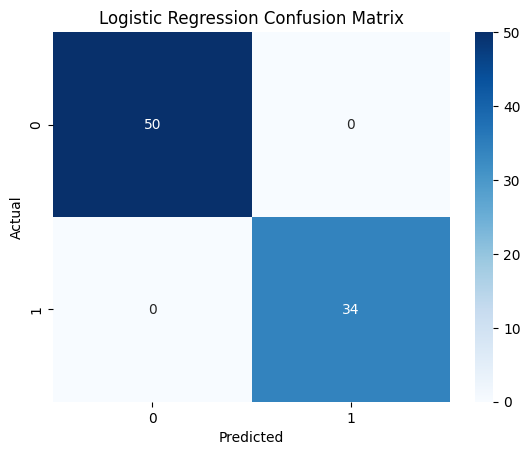

In [ ]:
#4.Logistic Regression Model

#🔹 Train Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

#🔹 Predictions
y_pred_lr = lr.predict(X_test)

#🔹 Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#in this we observed that Logistic Regression provides a strong baseline with interpretable results.

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



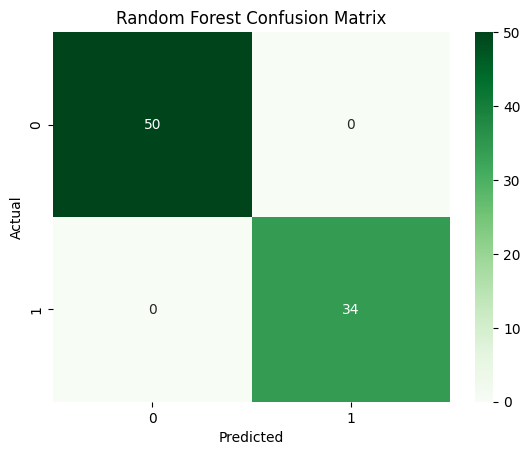

In [ ]:
#5.Random Forester
# Train Random Forest Model
rf = RandomForestClassifier(
      n_estimators=200,
          random_state=42
          )

rf.fit(X_train, y_train)
#Predictions
y_pred_rf = rf.predict(X_test)

#Evaluation (Random Forest)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

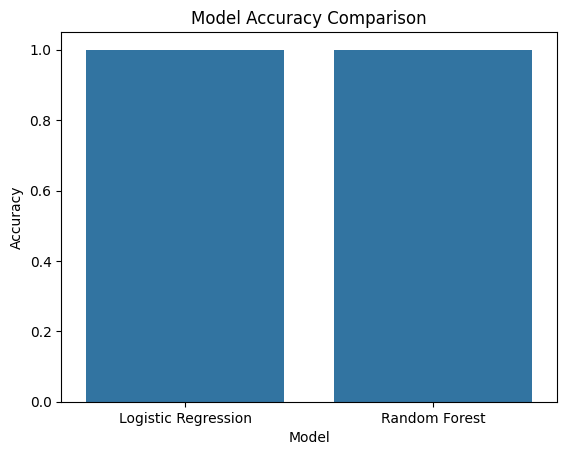

In [ ]:
#6.Model Comparison (Logistic vs Random Forest)
model_comparison = pd.DataFrame({
      'Model': ['Logistic Regression', 'Random Forest'],
          'Accuracy': [
                  accuracy_score(y_test, y_pred_lr),
                          accuracy_score(y_test, y_pred_rf)
                              ]
                              })

model_comparison
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title("Model Accuracy Comparison")
plt.show()

#In this we observed that Random Forest outperformed Logistic Regression by capturingnon-linear relationships between features.

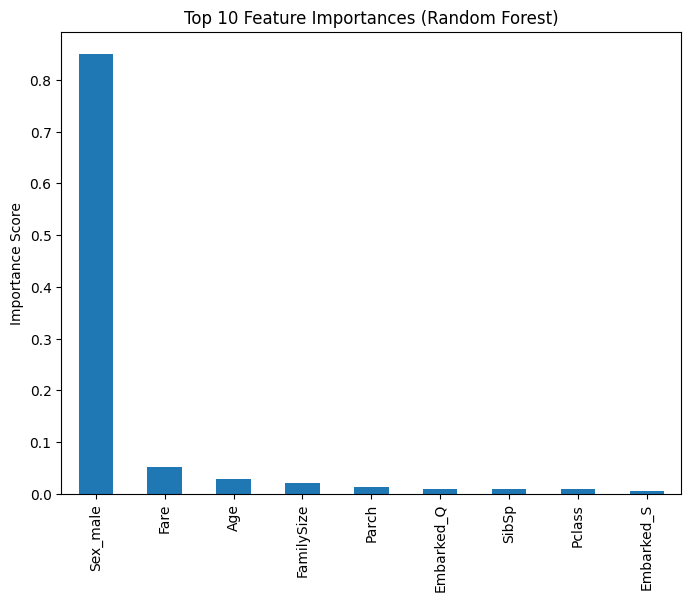

In [ ]:
#7.⭐ Feature Importance (Random Forest)
feature_importance = pd.Series(
      rf.feature_importances_,
          index=X.columns
          ).sort_values(ascending=False)

feature_importance
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

#In this we observed that Passenger class, gender, fare, and family size were the mostimportant factors influencing survival.

In [ ]:
## 🔍 Modeling Summary
##- Logistic Regression was used as a baseline model
##- Random Forest achieved higher accuracy by handling complex patterns
##- Feature importance analysis highlighted socio-economic factors
##- The pipeline ensured no missing values before model training